In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [131]:
#load dataset
movies_data=pd.read_csv("F:/python classes/projects/Data science with Python 1/movies.dat",encoding="ISO-8859-1", sep='::',header=None,
                        names=['MovieID','Title','Genres'],engine='python')
users_data=pd.read_csv("F:/python classes/projects/Data science with Python 1/users.dat",encoding="ISO-8859-1", sep='::',
                        header=None, names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
ratings_data=pd.read_csv("F:/python classes/projects/Data science with Python 1/ratings.dat",encoding="ISO-8859-1", sep='::',
                        header=None, names=['UserID','MovieID','Rating','Timestamp'],engine='python')

In [132]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [133]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [134]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [135]:
movies_data.shape
ratings_data.shape
users_data.shape

(6040, 5)

In [136]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [137]:
#Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
#(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
movie_ratings_df=pd.merge(movies_data,ratings_data, on = 'MovieID')
movie_ratings_df.head()



,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [138]:
movie_ratings_user_df=pd.merge(users_data,movie_ratings_df, on='UserID')
movie_ratings_user_df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [139]:
master_data=movie_ratings_user_df.drop(['Timestamp','Zip-code'], axis=1)
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1,Toy Story (1995),Animation|Children's|Comedy,5
1,1,F,1,10,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,1,F,1,10,150,Apollo 13 (1995),Drama,5
3,1,F,1,10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,1,10,527,Schindler's List (1993),Drama|War,5


In [140]:
master_data.describe(include='all')

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
count,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1000209,1.000209e+06
unique,NaN,2,NaN,NaN,NaN,3706,301,NaN
top,NaN,M,NaN,NaN,NaN,American Beauty (1999),Comedy,NaN
freq,NaN,753769,NaN,NaN,NaN,3428,116883,NaN
mean,3.024512e+03,NaN,2.973831e+01,8.036138e+00,1.865540e+03,NaN,NaN,3.581564e+00
std,1.728413e+03,NaN,1.175198e+01,6.531336e+00,1.096041e+03,NaN,NaN,1.117102e+00
min,1.000000e+00,NaN,1.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00
25%,1.506000e+03,NaN,2.500000e+01,2.000000e+00,1.030000e+03,NaN,NaN,3.000000e+00
50%,3.070000e+03,NaN,2.500000e+01,7.000000e+00,1.835000e+03,NaN,NaN,4.000000e+00
75%,4.476000e+03,NaN,3.500000e+01,1.400000e+01,2.770000e+03,NaN,NaN,4.000000e+00


In [141]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Title       1000209 non-null  object
 6   Genres      1000209 non-null  object
 7   Rating      1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


#Visual Representation of data


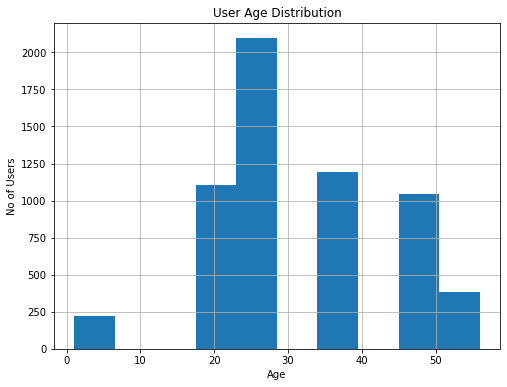

In [142]:
#user age distribution
plt.figure(figsize=(8,6))
users_data.Age.hist()
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of Users")
plt.show()

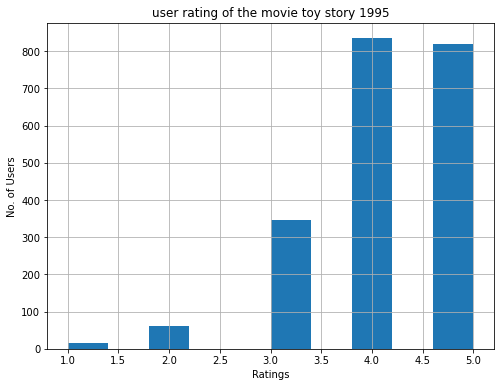

In [143]:
#user rating of the movie toy story 1995
plt.figure(figsize=(8,6))
movies_grp=movie_ratings_df.groupby('Title')
toy_story=movies_grp.get_group("Toy Story (1995)")
toy_story['Rating'].hist()
plt.title("user rating of the movie toy story 1995")
plt.xlabel("Ratings")
plt.ylabel("No. of Users")
plt.show()

In [144]:
#Top 25 movies by viewership rating


In [145]:
#average rating of the movies
rating_avg=movie_ratings_df.groupby('Title')["Rating"].mean()
rating_avg.head()

Title
$1,000,000 Duck (1971)           3.027027
'Night Mother (1986)             3.371429
'Til There Was You (1997)        2.692308
'burbs, The (1989)               2.910891
...And Justice for All (1979)    3.713568
Name: Rating, dtype: float64

In [146]:
rating_avg=rating_avg.sort_values(ascending=False)
rating_avg.head()

Title
Ulysses (Ulisse) (1954)     5.0
Lured (1947)                5.0
Follow the Bitch (1998)     5.0
Bittersweet Motel (2000)    5.0
Song of Freedom (1936)      5.0
Name: Rating, dtype: float64

In [147]:
#number of rating for the movies
rating_count=movie_ratings_df.groupby('Title')['Rating']
rating_count=rating_count.count().sort_values(ascending=False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [148]:
rating_avg_count=pd.DataFrame(data=rating_avg)
rating_avg_count['no_of_ratings']=pd.DataFrame(rating_count)
rating_avg_count.head()

,Rating,no_of_ratings
Title,,
Ulysses (Ulisse) (1954),5.0,1
Lured (1947),5.0,1
Follow the Bitch (1998),5.0,1
Bittersweet Motel (2000),5.0,1
Song of Freedom (1936),5.0,1


In [149]:
rating_avg_count.describe()

,Rating,no_of_ratings
count,3706.000000,3706.000000
mean,3.238892,269.889099
std,0.672925,384.047838
min,1.000000,1.000000
25%,2.822705,33.000000
50%,3.331546,123.500000
75%,3.740741,350.000000
max,5.000000,3428.000000


In [150]:
# top 25 movies by viewership
#rating excluding movies with less then 10 ratings
filter_data=rating_avg_count[rating_avg_count['no_of_ratings']>10]
filter_data[:25]

,Rating,no_of_ratings
Title,,
Sanjuro (1962),4.608696,69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470


In [151]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [152]:
User_2696=movie_ratings_user_df[movie_ratings_user_df['UserID']==2696]
User_2696

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
440667,2696,M,25,7,24210,350,"Client, The (1994)",Drama|Mystery|Thriller,3,973308886
440668,2696,M,25,7,24210,800,Lone Star (1996),Drama|Mystery,5,973308842
440669,2696,M,25,7,24210,1092,Basic Instinct (1992),Mystery|Thriller,4,973308886
440670,2696,M,25,7,24210,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,3,973308690
440671,2696,M,25,7,24210,1258,"Shining, The (1980)",Horror,4,973308710
440672,2696,M,25,7,24210,1270,Back to the Future (1985),Comedy|Sci-Fi,2,973308676
440673,2696,M,25,7,24210,1589,Cop Land (1997),Crime|Drama|Mystery,3,973308865
440674,2696,M,25,7,24210,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4,973308842
440675,2696,M,25,7,24210,1625,"Game, The (1997)",Mystery|Thriller,4,973308842
440676,2696,M,25,7,24210,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2,973308920


In [153]:
User_2696.count()

UserID        20
Gender        20
Age           20
Occupation    20
Zip-code      20
MovieID       20
Title         20
Genres        20
Rating        20
Timestamp     20
dtype: int64

# # Feature Engineering


In [154]:
# The unique genres
movie_ratings_df['Genres'].value_counts().head()

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

In [155]:
movie_ratings_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [156]:
movie_ratings_user_df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [167]:
movie_ratings_selected_df=movie_ratings_user_df[['Gender','Age','Occupation','Rating','Genres']]

In [168]:
Genre=movie_ratings_selected_df["Genres"]
Genre=Genre.str.get_dummies().add_prefix('Genres_')
movie_ratings_genres_df=pd.concat(
    [movie_ratings_selected_df.drop(['Genres'], axis=1), Genre], axis=1
   )
movie_ratings_genres_df.head()

,Gender,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,F,1,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [169]:
movie_ratings_genres_df=pd.get_dummies(movie_ratings_genres_df, columns=['Gender'])

In [170]:
movie_ratings_genres_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,5,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,5,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,10,4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [171]:
movie_ratings_genres_df.columns

Index(['Age', 'Occupation', 'Rating', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [ ]:
#features affecting the ratings of the movies

In [172]:
movie_ratings_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   Age                 1000209 non-null  int64
 1   Occupation          1000209 non-null  int64
 2   Rating              1000209 non-null  int64
 3   Genres_Action       1000209 non-null  int64
 4   Genres_Adventure    1000209 non-null  int64
 5   Genres_Animation    1000209 non-null  int64
 6   Genres_Children's   1000209 non-null  int64
 7   Genres_Comedy       1000209 non-null  int64
 8   Genres_Crime        1000209 non-null  int64
 9   Genres_Documentary  1000209 non-null  int64
 10  Genres_Drama        1000209 non-null  int64
 11  Genres_Fantasy      1000209 non-null  int64
 12  Genres_Film-Noir    1000209 non-null  int64
 13  Genres_Horror       1000209 non-null  int64
 14  Genres_Musical      1000209 non-null  int64
 15  Genres_Mystery      1000209 non-null  int64
 16  

In [ ]:
#linear regression

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [192]:
linreg=LinearRegression(copy_X=True,
    fit_intercept=True,
    n_jobs=1,
    normalize=False)

In [193]:
movie_ratings_user_sample_df=movie_ratings_genres_df.sample(n=50000, random_state=0)
movie_ratings_user_sample_df.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,25,7,4,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
818637,18,12,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
148677,35,1,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
778790,35,12,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
525489,18,2,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
x=movie_ratings_user_sample_df.drop('Rating',axis=1)
y=movie_ratings_user_sample_df['Rating']

In [195]:
x.shape

(50000, 22)

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0)

In [229]:
linreg=LinearRegression()

In [230]:
linreg.fit(x_train,y_train)

LinearRegression()

In [231]:
y_pred=linreg.predict(x_test)

In [232]:
#Evaluation

In [234]:
print("y-intercept :",linreg.intercept_)
print("beta-coeff:", linreg.coef_)
print('mean abs error (Mae):', metrics.mean_absolute_error(y_test,y_pred))
print('mean sq error (Mse):', metrics.mean_squared_error(y_test,y_pred))
print('root mean sq error (Rmse):',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 value:',metrics.r2_score(y_test,y_pred))

y-intercept : 3.374735735951808
beta-coeff: [ 0.00420141  0.00134829 -0.10334775  0.01471515  0.3815563  -0.30555374
 -0.01759425  0.07306099  0.43689216  0.24251569  0.06496262  0.45160268
 -0.3018873   0.13864669 -0.0104744  -0.03902679 -0.0485681   0.04487312
  0.28501156  0.14764937  0.00686483 -0.00686483]
mean abs error (Mae): 0.8978601708304966
mean sq error (Mse): 1.1921537526095152
root mean sq error (Rmse): 1.0918579360931142
r2 value: 0.036002917518695554


In [235]:
# Age and occupation are the main features affecting ratings


In [225]:
x_train.dtypes

Age                   int64
Occupation            int64
Genres_Action         int64
Genres_Adventure      int64
Genres_Animation      int64
Genres_Children's     int64
Genres_Comedy         int64
Genres_Crime          int64
Genres_Documentary    int64
Genres_Drama          int64
Genres_Fantasy        int64
Genres_Film-Noir      int64
Genres_Horror         int64
Genres_Musical        int64
Genres_Mystery        int64
Genres_Romance        int64
Genres_Sci-Fi         int64
Genres_Thriller       int64
Genres_War            int64
Genres_Western        int64
Gender_F              uint8
Gender_M              uint8
dtype: object

In [236]:
prediction_df=pd.DataFrame({'Test': y_test, 'prediction': y_pred})
prediction_df.head()

,Test,prediction
187446,1,3.455632
69421,3,3.423027
941725,2,3.186482
841836,3,3.421082
869012,4,3.700888
